# Satellite Image Analysis using numpy, scipy, matplotlib

(3725, 4797, 3)

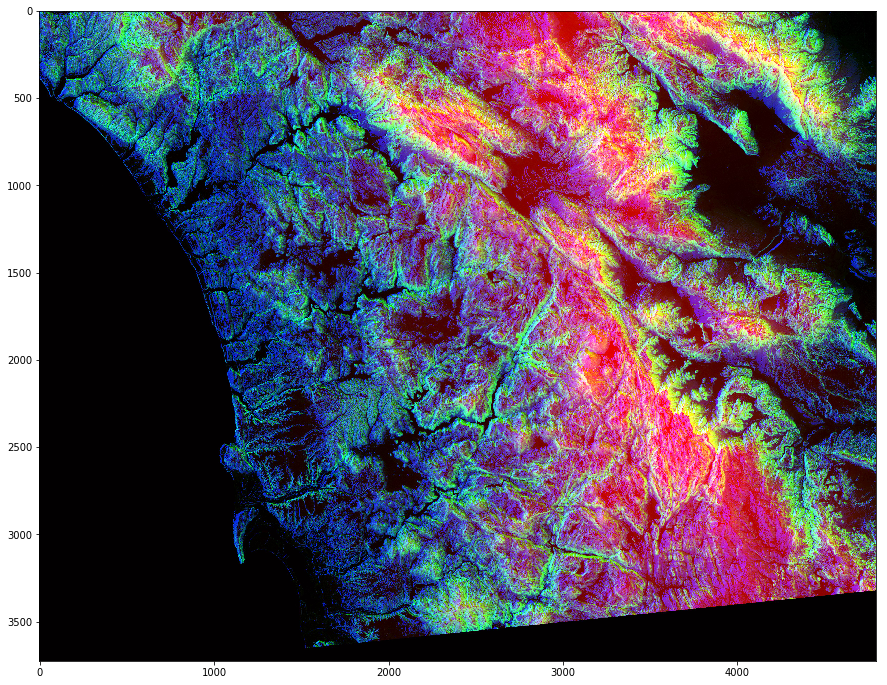

In [71]:
%matplotlib inline     
# the output of plotting commands is displayed inline 
import numpy as np
import matplotlib.pyplot as plt
import imageio

photo_data = imageio.imread('./sd-3layers.jpg')

plt.figure(figsize=(15,15))
plt.imshow(photo_data)
np.shape(photo_data)

### RGB color mapping in the image:
* Red indicates Altitude
* Green indicates Slope
* Blue indicates <a href="https://en.wikipedia.org/wiki/Aspect_(geography)">Aspect</a>

Higher values indicate increased Altitude, Slope and Aspect

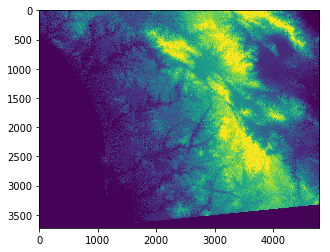

In [19]:
plt.imshow(photo_data[:,:,0])
# This shows an altitude map

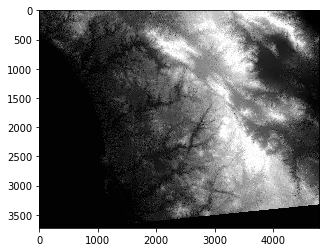

In [20]:
plt.imshow(photo_data[:,:,0],cmap='gray')
# Shows an altitude map in gray scale

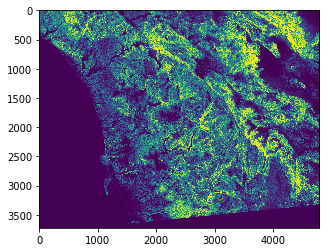

In [21]:
plt.imshow(photo_data[:,:,1])
# Shows slope map (i.e., how steep it is; higher the intensity - steeper it is)

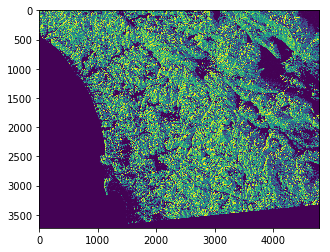

In [23]:
plt.imshow(photo_data[:,:,2])
# Shows aspect (i.e., which direction on compass the slope facing is) 
# (assuming 0-255 intensity scales with 0-360 clockwise, with 0 pointing to north)

## Let's say I'm only interested in higher altitudes

Filter out all altitude data less than half the maximum

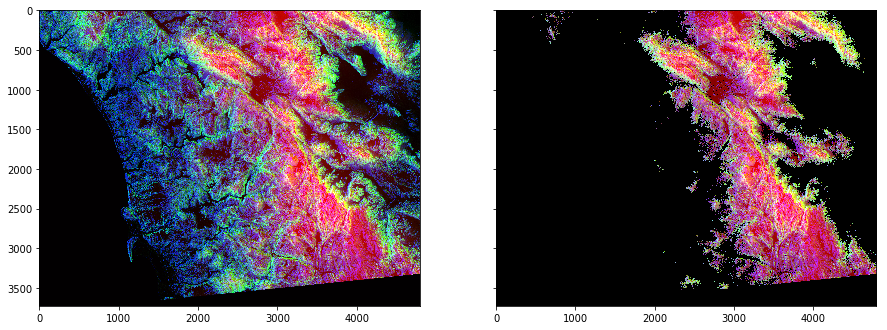

In [48]:
half_alt_filter = photo_data[:,:,0] < 128
half_alt_photo = np.copy(photo_data)
half_alt_photo[half_alt_filter] = 0

# f = plt.figure()
# ax = f.add_subplot()

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,15))
ax1.imshow(photo_data)
ax2.imshow(half_alt_photo)

## Combination of altitude, slope and aspect

Say, less than half the max altitude, high slope, facing NE

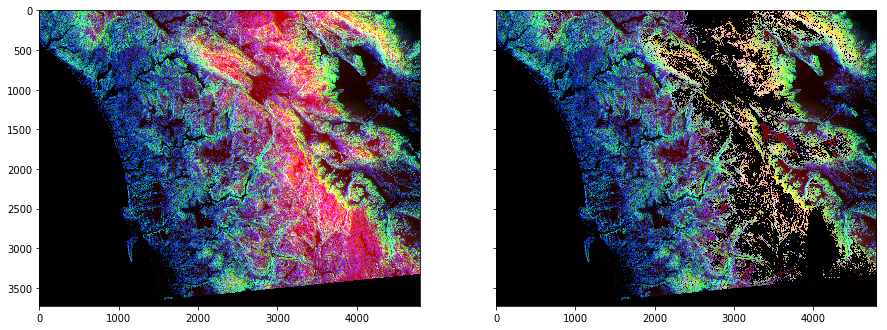

In [70]:
alt_filter = photo_data[:,:,0] > 128
slope_filter = photo_data[:,:,1] < 128
aspect_filter = photo_data[:,:,2] > 64
final_filter = np.logical_and(alt_filter, slope_filter, aspect_filter)

select_region_photo = np.copy(photo_data)
select_region_photo[final_filter] = 0

# f = plt.figure()
# ax = f.add_subplot()

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,15))
ax1.imshow(photo_data)
ax2.imshow(select_region_photo)

## Now let's say that I'm only interested in certain area with a given radius from some epicenter

Create a circular mask and filter data accordingly

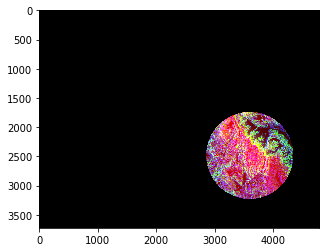

In [67]:
total_rows, total_cols, total_layers = photo_data.shape
X, Y = np.ogrid[:total_rows, :total_cols]
center_row, center_col = total_rows * 2/3, total_cols * 3/4
dist_from_center = np.sqrt((X - center_row)**2 + (Y - center_col)**2)
radius = (total_rows / 5)
circular_mask = (dist_from_center > radius)

circular_photo = np.copy(photo_data)
circular_photo[circular_mask] = 0
plt.imshow(circular_photo)